In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D,Dense, Flatten, Dropout, MaxPool2D
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train) , (x_test,y_test) = fashion_mnist.load_data()
x_train,x_test = x_train/255.0,x_test/255.0

In [3]:
print (x_train.shape)

(60000, 28, 28)


In [4]:
x_train= np.expand_dims(x_train,-1)
x_test= np.expand_dims(x_test,-1)
print (x_train.shape)

(60000, 28, 28, 1)


In [5]:
K = len(set(y_train))
print("Number of classes: {}".format(K))

Number of classes: 10


## Building model using Functional API using only convolutional layers with strides of 2

In [6]:
# Building the Model with Functional API.

i = Input(shape=x_train[0].shape)
x = Conv2D(32,(3,3),strides=2,activation='relu')(i)
x = Conv2D(64,(3,3),strides=2,activation='relu')(x)
x = Conv2D(128,(3,3),strides=2,activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = Dense(K,activation='softmax')(x)

model = Model(i,x)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 116s 2ms/sample - loss: 0.5189 - acc: 0.8071 - val_loss: 0.4416 - val_acc: 0.8389
Epoch 2/10
60000/60000 [==============================] - 166s 3ms/sample - loss: 0.3586 - acc: 0.8649 - val_loss: 0.3503 - val_acc: 0.8697
Epoch 3/10
60000/60000 [==============================] - 128s 2ms/sample - loss: 0.3088 - acc: 0.8821 - val_loss: 0.3108 - val_acc: 0.8867
Epoch 4/10
60000/60000 [==============================] - 138s 2ms/sample - loss: 0.2749 - acc: 0.8968 - val_loss: 0.3175 - val_acc: 0.8810
Epoch 5/10
60000/60000 [==============================] - 139s 2ms/sample - loss: 0.2493 - acc: 0.9060 - val_loss: 0.2930 - val_acc: 0.8927
Epoch 6/10
60000/60000 [==============================] - 139s 2ms/sample - loss: 0.2274 - acc: 0.9142 - val_loss: 0.2878 - val_acc: 0.8977
Epoch 7/10
60000/60000 [==============================] - 140s 2ms/sample - loss: 0.2084 - acc: 0.9196 - val_l

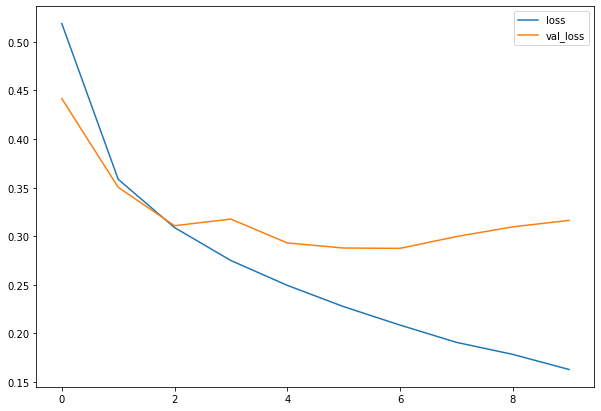

In [10]:
plt.figure(figsize=(10,7))
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

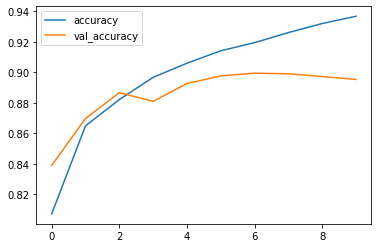

In [11]:
plt.plot(r.history['acc'],label='accuracy')
plt.plot(r.history['val_acc'],label='val_accuracy')
plt.legend()
plt.show()

In [12]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print ("Normalized Confusion Matrix")
    else:
        print ("Confusion Matrix, without normalization.")
    
    print (cm)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation = 0)
    plt.yticks(tick_marks,classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(
                j,i,format(cm[i,j],fmt),
                horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black'
                )
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

Confusion Matrix, without normalization.
[[824   0  27  14   3   1 124   0   7   0]
 [  0 978   2  14   1   0   4   0   1   0]
 [ 14   0 823   6  80   0  76   0   1   0]
 [ 15   9  27 866  41   0  38   1   3   0]
 [  1   2  35   7 898   0  54   0   3   0]
 [  1   0   0   1   0 970   0  18   2   8]
 [ 91   1  55  14 124   0 700   0  15   0]
 [  0   0   0   0   0   8   0 974   0  18]
 [  4   1   3   1   6   1   4   3 977   0]
 [  0   0   0   0   0   8   1  46   1 944]]


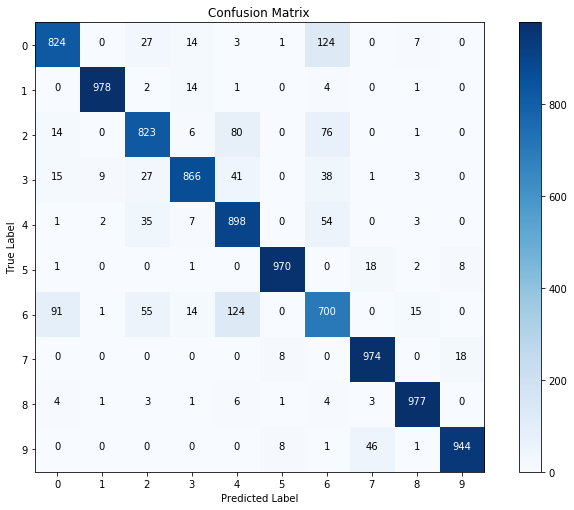

In [18]:
test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,test)
plt.figure(figsize=(10,7))
plot_confusion_matrix(cm,list(range(K)))

Normalized Confusion Matrix
[[0.824 0.    0.027 0.014 0.003 0.001 0.124 0.    0.007 0.   ]
 [0.    0.978 0.002 0.014 0.001 0.    0.004 0.    0.001 0.   ]
 [0.014 0.    0.823 0.006 0.08  0.    0.076 0.    0.001 0.   ]
 [0.015 0.009 0.027 0.866 0.041 0.    0.038 0.001 0.003 0.   ]
 [0.001 0.002 0.035 0.007 0.898 0.    0.054 0.    0.003 0.   ]
 [0.001 0.    0.    0.001 0.    0.97  0.    0.018 0.002 0.008]
 [0.091 0.001 0.055 0.014 0.124 0.    0.7   0.    0.015 0.   ]
 [0.    0.    0.    0.    0.    0.008 0.    0.974 0.    0.018]
 [0.004 0.001 0.003 0.001 0.006 0.001 0.004 0.003 0.977 0.   ]
 [0.    0.    0.    0.    0.    0.008 0.001 0.046 0.001 0.944]]


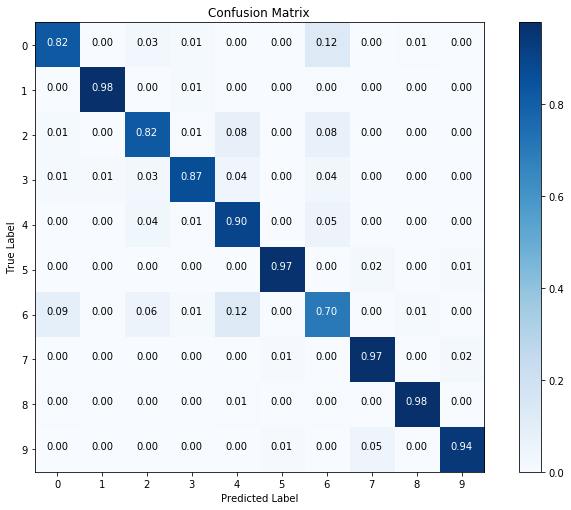

In [20]:
test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,test)
plt.figure(figsize=(10,7))
plot_confusion_matrix(cm,list(range(10)),True)